# 1. Principal Component Analysis 
One of the most used techniques when performing dimensionality reduction is **principal component analysis**. 

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

In [4]:
num_points = 100
x_1 = np.linspace(0, 6, num_points)
noise = np.random.normal(0,1,num_points)
x_2 = 2*x_1 + noise

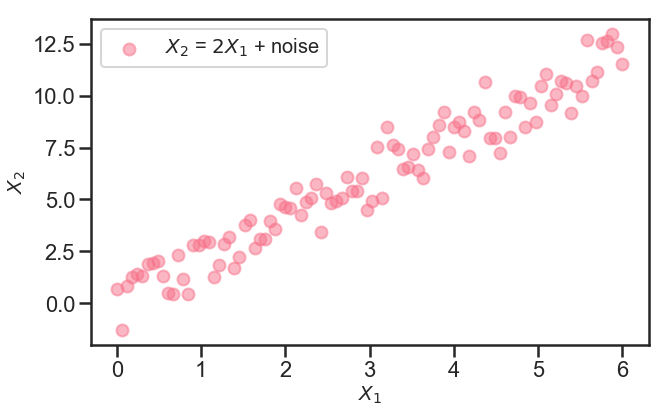

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
    
plt.scatter(x_1, x_2, alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('$X_1$', fontsize=20)
ax.set_ylabel('$X_2$', fontsize=20)

plt.show()

We then want to center the data so that the origin is dead in the center of the data cloud. To do this, we simply subtract the mean from each dimension. 

In [6]:
mu_x_1 = x_1.mean()
mu_x_2 = x_2.mean()
print('Mean of x_1: ', mu_x_1, '\nMean of x_2: ', mu_x_2)

Mean of x_1:  3.0 
Mean of x_2:  6.067744555367255


In [7]:
centered_x_1 = x_1 - mu_x_1
centered_x_2 = x_2 - mu_x_2

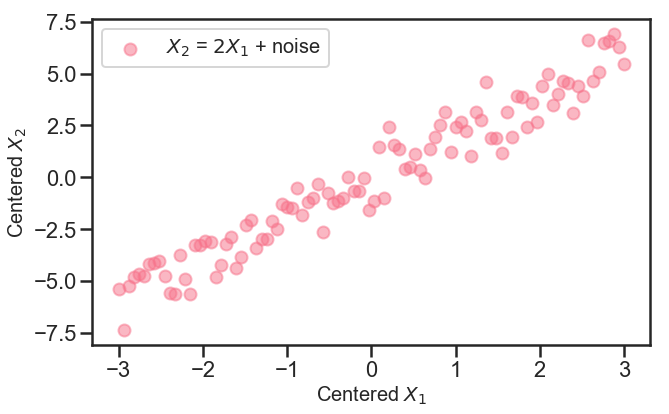

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

We can now compute the covariance matrix $\Sigma$. The covariance between two attributes is essentially an indication as to whether they change together or in opposite directions. The covariance matrix is defined as:

$$cov(X_1,X_2) = E \big[(X_1 - E[X_1])(X_2 - E[X_2])\big]$$

Where $E$ is the expected value, and hence in this case the mean. This allows us to rewrite the above as:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i - E[X_1])(X_2^i - E[X_2])$$

And $E[X_1]$ is simply the expected value of $X_1$, in which case as a random variable that simplifies to the mean of X_1, $\mu_{X_1}$. The same goes for $X_2$:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i - \mu_{X_1})(X_2^i - \mu_{X_2})$$

Finally, remember that we already have centered the data by subtracting the mean in the prior step, so that is no longer necessary, reducing our equation to:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i)(X_2^i)$$

Now, one final point: when calculating the covariance matrix we will need to determine how $X_1$ varies with $X_2$, but also how $X_2$ varies with $X_1$ (they will be the same), and then how $X_1$ and $X_2$ vary with themselves (the variance). We can write a simple function to do just that:

In [9]:
def calculate_covariance(a,b):
    """a and b are both numpy arrays."""
    return (a*b).sum() / len(a)

In [10]:
print('Covariance between X_1 and X_2: ', calculate_covariance(centered_x_1, centered_x_2))
print('Covariance between X_2 and X_1: ', calculate_covariance(centered_x_2, centered_x_1))
print('Variance between X_1 and X_1: ', calculate_covariance(centered_x_1, centered_x_1))
print('Variance between X_2 and X_2: ', calculate_covariance(centered_x_2, centered_x_2))

Covariance between X_1 and X_2:  5.920941218632329
Covariance between X_2 and X_1:  5.920941218632329
Variance between X_1 and X_1:  3.0606060606060606
Variance between X_2 and X_2:  12.202445971340742


We can quickly compare our results to the built in covariance matrix function, `np.cov`, supplied from numpy:

In [48]:
covariance_matrix = np.cov(centered_x_1, centered_x_2, bias=True)
print('Numpy calculated covariance matrix: \n', covariance_matrix)

Numpy calculated covariance matrix: 
 [[ 3.06060606  5.92094122]
 [ 5.92094122 12.20244597]]


Looks like our function lines up perfectly. For a quick sanity check, do these values make sense? We have found a variance of 3.06 for $X_1$ and 13.9 for $X_2$. That seems reasonable, considering our points are clearly more spread out in $X_2$. And we then found a positive covariance of 6.17 when relating $X_1$ to $X_2$; this also makes sense considering our points do clearly seem to co-vary positively. 

## Multiplying by the covariance matrix
Now, let's say for a moment that we have the following vectors (red, green, and blue below), which correspond to our points in the cartesian plane:

```
vector_red = np.array([[-0.4], [0.6]])   # (-0.4, 0.6)
vector_green = np.array([[.85], [-0.6]]) # (0.85, -0.6)
vector_blue = np.array([[0.05], [-2.0]]) # (0.05, -2.0) 
```

In [12]:
colors = ['r', 'g', 'b']
vector_red = np.array([[-0.4], [0.6]])
vector_green = np.array([[.85], [-0.6]])
vector_blue = np.array([[0.05], [-2.0]])
vectors = [[vector_red, vector_green, vector_blue]]

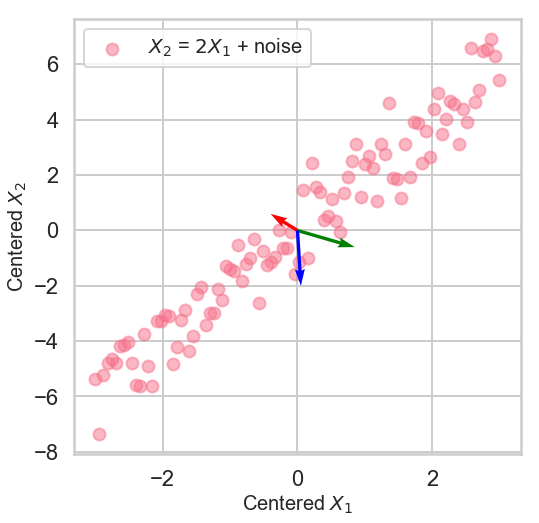

In [13]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

for idx, v in enumerate(vectors[0]):
    ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]])

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

Now, we had just found the covariance matrix a moment ago. What would the result be if we transformed our vectors above by the covariance matrix (via a matrix multiplication)? Let's take a look:

In [14]:
vectors.append([covariance_matrix.dot(v) for v in vectors[-1]])

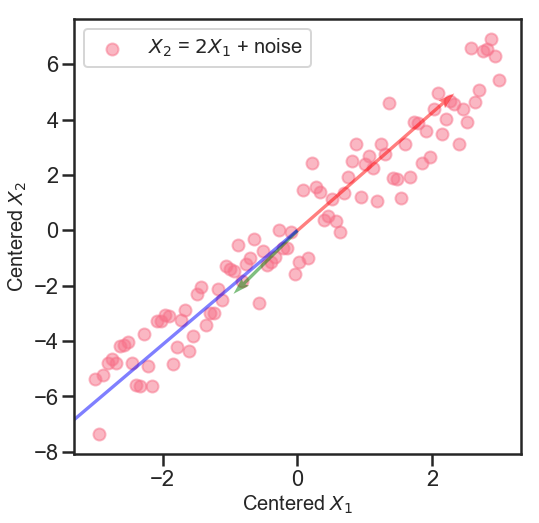

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

for idx, v in enumerate(vectors[-1]):
    ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

Ahh! Very interesting; it appears as though that transformation seemed to turn our vectors towards the direction of greatest variance in the data. Let's perform that matrix multiplication a second time (on the transformed vectors):

In [16]:
vectors.append([covariance_matrix.dot(v) for v in vectors[-1]])

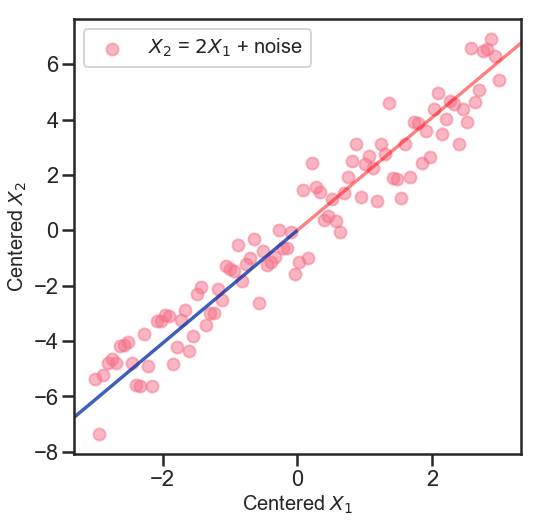

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

for idx, v in enumerate(vectors[-1]):
    ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

Our vectors seems to be be perfectly in line with the direction of greatest variance now! It seems to be that our vectors were rotated in the direction of greatest variance, while subsequently having a greater magnitude after each transformation! Now, what is equally interesting is that our vectors appear to be _converging_ to a specific slope! Let's take a look at each vector:

In [18]:
for idx, color in enumerate(['Red', 'Green', 'Blue']):
    print('\n'+ color + 'Vector: ')
    for i in range(len(vectors)):
        print(f'Slope at t = {i}: ', vectors[i][idx][1][0] / vectors[i][idx][0][0] )


RedVector: 
Slope at t = 0:  -1.4999999999999998
Slope at t = 1:  2.127321926433613
Slope at t = 2:  2.0362002420397505

GreenVector: 
Slope at t = 0:  -0.7058823529411765
Slope at t = 1:  2.4064650212820125
Slope at t = 2:  2.0385583845316875

BlueVector: 
Slope at t = 0:  -40.0
Slope at t = 1:  2.0625502491506236
Slope at t = 2:  2.0355801103155335


We can clearly see that they each are converging to a specific slope, `~2.15`. So the slope is cleary getting closer and closer to _something_, and if we look at our plot we can see that that is what we would pick out as the dimension of greatest variance. Put another way, it is the dimension where the data points seem to be spread out the most. 

This is definitely an interesting behavior; we have taken a random vector(s), multiplied them by the covariance matrix, and that appears to have turned it towards the dimension of the greatest variance. 

So, we can see that by iteratively multiplying these random vectors by the covariance matrix we have found the dimension of greatest variance that we would have also found via visual inspection. There is another way that we can go about this though! What we are actually looking for are vectors that are not _turned_ when multiplied by the covariance matrix. By definition those are simply our **eigenvectors**! The eigenvector equation can be seen below:

$$\Sigma v = \lambda v$$

Here we transform a vector $v$ by the covariance matrix, $\Sigma$, and if $v$ is an eigenvector it simply is _scaled_ by its eigenvalue (and not rotated). Another way to think about this is that $v$ remains on its _span_. So, what we have come to discover is that our principal components are actually our eigenvectors with the largest eigenvalues! 

### Finding the Eigenvalues and Eigenvectors
So, how do we actually go about finding the eigenvalues and eigenvectors? The mechanical process of doing so by hand is covered in any introductory linear algebra course and countless tutorials, and to be honest not entirely enlightening. We will do so below via numpy's `linalg.eig(A)` function:

In [50]:
e_val, e_vec = np.linalg.eig(covariance_matrix)
print('Eigen Values: ', e_val)
print('Eigen Vectors: ', e_vec)

Eigen Values:  [ 0.15149566 15.11155637]
Eigen Vectors:  [[-0.89751966 -0.44097445]
 [ 0.44097445 -0.89751966]]


We can then see where they land in our plot:

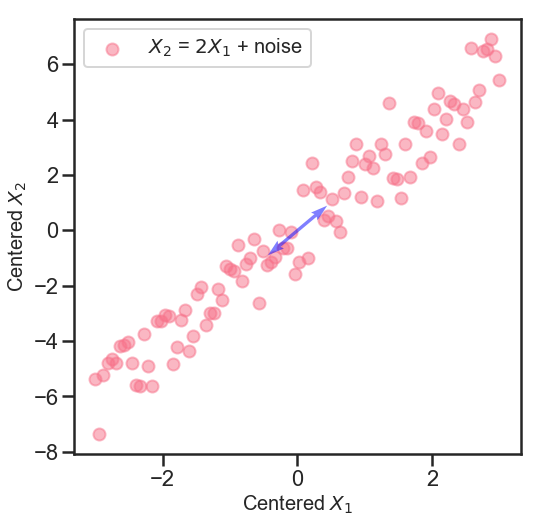

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)


ax.quiver([0], [0], [0.44], [0.897], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.5)
ax.quiver([0], [0], [-0.44], [-0.897], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()